In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [85]:
def coin_op(NW, NC):
    II = np.eye(NW,dtype='complex')
    C  = 2*np.ones((NC, NC))/NC - np.eye(NC)
    
    return np.kron(C,II)

def shift_op_cycle(NW,NC):
    S = np.zeros([NC*NW,NC*NW],dtype='complex')
    
    aux_d = np.arange(-(NC-1)/2,(NC-1)/2+1,dtype='int')    
    for d in range(NC):
        coin_aux = np.zeros([NC,NC],dtype='complex')
        coin_aux[d,d] = 1
        
        shift_aux = np.zeros([NW,NW],dtype='complex')
        for x in range(NW):
            shift_aux[(x + aux_d[d])%NW,x] = 1
            
        
        S += np.kron(coin_aux,shift_aux)
    
    return S

def initial_cond(coin,nw,nc):
    i_aux  = np.zeros([nw,1],dtype='complex')
    i_aux[nw//2,0] = 1
    
    i_coin = np.zeros([nc,1],dtype='complex')
    for x in range(nc):
        i_coin[x,0] = coin[x]
        
    return np.kron(i_coin,i_aux)

def superposition(nw,nc):
    state = np.ones([nw,1])/np.sqrt(nw)
    coin_state = np.ones([nc,1])/np.sqrt(nc)
#     coin_state[0] = 1
    
    return np.kron(state,coin_state)

def oracle_op(nw,nc, marked):
    O = np.matrix(np.eye(nw))
    O[marked,marked] = -1
    
    
    return np.kron(np.eye(nc),O)
    
def evolution(U,steps,initial,nw,nc):
    
    for t in range(steps):
        initial = U@initial
      
    final = np.zeros([nw,1])
    for x in range(nw):
        for c in range(nc):
            final[x] = np.sum(np.abs(initial[c*nc + x,0])**2)
    
    return final

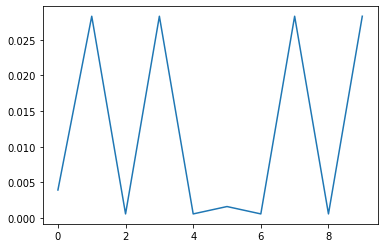

In [93]:
nw = 10
nc = 10
steps = 7
marked = [0]

initial = superposition(nw,nc)
C = coin_op(nw,nc)
S = shift_op_cycle(nw,nc)
O = np.array(oracle_op(nw,nc, marked))

probs = evolution(S@C@O,steps,initial,nw,nc)
plt.plot(probs)
plt.show()

In [41]:
len(initial)

30